In [156]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [157]:
df = pd.read_csv('winequality-red.csv',delimiter=';')

In [158]:
x= df.iloc[:, :-1].values  
y= df.iloc[:, 11].values  

In [159]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rfe = RFE(clf,n_features_to_select=9)

rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=9)

In [162]:
y_pred_test= rfe.predict(x_test)  
y_pred_train = rfe.predict(x_train)


In [163]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.19      0.27      0.22        11
           5       0.79      0.77      0.78       135
           6       0.74      0.60      0.66       142
           7       0.35      0.67      0.46        27
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.34      0.38      0.35       320
weighted avg       0.70      0.66      0.67       320



In [164]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       496
           7       1.00      1.00      1.00       172
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



In [165]:
from sklearn.utils import resample

df_minority1 = df[df.quality==3] 
df_minority2 = df[df.quality==4] 
df_minority3 = df[df.quality==7] 
df_minority4 = df[df.quality==8] 
df_majority1 = df[df.quality==5] 
df_majority2= df[df.quality==6]


# Downsampling
df_majority_downsampled = resample(df_majority1, 
                                 replace=False,
                                 n_samples=400,
                                 random_state=123) 

df_majority_downsampled1 = resample(df_majority2, 
                                 replace=False,
                                 n_samples=400,
                                 random_state=123)
#Upsampling 
df_minority_up = resample(df_minority1, 
                        replace=True,
                        n_samples=400,
                        random_state=123) 

df_minority_up1 = resample(df_minority2, 
                        replace=True,
                        n_samples=400,
                        random_state=123) 

df_minority_up2 = resample(df_minority3, 
                        replace=True,
                        n_samples=400,
                        random_state=123) 
df_minority_up3 = resample(df_minority4, 
                        replace=True,
                        n_samples=400,
                        random_state=123) 

df_resampled = pd.concat([df_majority_downsampled,df_majority_downsampled1,df_minority_up,df_minority_up1, df_minority_up2,df_minority_up3])
df_resampled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1479,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5
760,9.0,0.580,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5
201,8.8,0.370,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3,5
1356,6.1,0.340,0.25,1.8,0.084,4.0,28.0,0.99464,3.36,0.44,10.1,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1061,9.1,0.400,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8


<AxesSubplot:xlabel='quality', ylabel='count'>

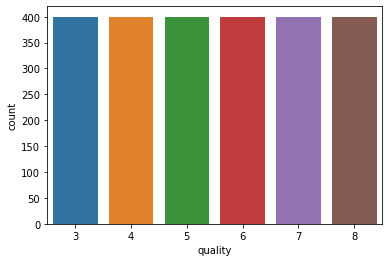

In [166]:
sns.countplot(x='quality',data=df_resampled)

In [167]:
x= df_resampled.iloc[:, :-1].values  
y= df_resampled.iloc[:, 11].values  

In [168]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

In [174]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import RFE

sm = SMOTE(random_state=0)

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rfe = RFE(clf,n_features_to_select=7)
x_sm , y_sm = sm.fit_resample(x_train,y_train)
rfe.fit(x_sm,y_sm)


RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=7)

In [170]:
y_pred_test= rfe.predict(x_test)  
y_pred_train = rfe.predict(x_train)


In [171]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        83
           4       0.94      1.00      0.97        76
           5       0.76      0.69      0.72        77
           6       0.68      0.62      0.65        88
           7       0.82      0.91      0.87        81
           8       1.00      1.00      1.00        75

    accuracy                           0.87       480
   macro avg       0.87      0.87      0.87       480
weighted avg       0.86      0.87      0.86       480



In [172]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       317
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       323
           6       1.00      1.00      1.00       312
           7       1.00      1.00      1.00       319
           8       1.00      1.00      1.00       325

    accuracy                           1.00      1920
   macro avg       1.00      1.00      1.00      1920
weighted avg       1.00      1.00      1.00      1920



In [173]:
from sklearn.pipeline import Pipeline, make_union
from sklearn.feature_selection import RFE, VarianceThreshold, SelectKBest, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import ClassifierChain


pipeline = Pipeline([
    ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=10)),
    ('cc', ClassifierChain(
        base_estimator=RandomForestClassifier(),
        classifiers=[
                    GaussianNB(),
                    KNeighborsClassifier(),
                    DecisionTreeClassifier(),
                    RandomForestClassifier(),
                    LogisticRegression(),
                    SVC()
        ]
    )),
])

pipeline.fit(x_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'classifiers'